<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [330]:
from google.colab import drive
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.express as px
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [555]:
raw_df = pd.read_csv('drive/MyDrive/ML/Clustering/marketing_campaign.csv', sep="\t")
df = raw_df
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [556]:
df.shape

(2240, 29)

In [557]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [558]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [559]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [560]:
df['Income'].fillna(df['Income'].median(), inplace=True)

<ipython-input-560-b0f8a841459e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [561]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Пропущенні значення замінила медіаною, тому що колонка Income має викиди і медіана менш чутлива до них. Також у нас небагато пропущенних значень, тому заміна медіаною не повинна мати великого ефекту на результати кластеризації.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [562]:
df.select_dtypes('object').head()

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


In [563]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [564]:
df['Year_regist'] = df['Dt_Customer'].dt.year
df['Month_regist'] = df['Dt_Customer'].dt.month
df['Day_regist'] = df['Dt_Customer'].dt.day
df['Weekday_regist'] = df['Dt_Customer'].dt.dayofweek
df['is_weekend'] = df['Weekday_regist'].isin([5,6]).astype('int')
df['time_since_regist'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days
df['age'] = datetime.now().year - df['Year_Birth']

In [565]:
df.drop(columns=['Dt_Customer','Year_Birth','ID'], inplace=True)

In [566]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Year_regist,Month_regist,Day_regist,Weekday_regist,is_weekend,time_since_regist,age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,3,11,1,2012,9,4,1,0,4605,68
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,3,11,0,2014,3,8,5,1,4055,71
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,3,11,0,2013,8,21,2,0,4254,60
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,3,11,0,2014,2,10,0,0,4081,41
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,11,0,2014,1,19,6,1,4103,44


In [567]:
cat_cols = df.select_dtypes('object').columns.tolist()
num_cols =  df.select_dtypes('number').columns.tolist()

In [568]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = 'passthrough'

In [569]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_cols),
        ('cat', categorical_transformer,cat_cols)
    ])
X_transformed = preprocessor.fit_transform(df)
features_names = preprocessor.get_feature_names_out()

In [570]:
features_names

array(['num__Income', 'num__Kidhome', 'num__Teenhome', 'num__Recency',
       'num__MntWines', 'num__MntFruits', 'num__MntMeatProducts',
       'num__MntFishProducts', 'num__MntSweetProducts',
       'num__MntGoldProds', 'num__NumDealsPurchases',
       'num__NumWebPurchases', 'num__NumCatalogPurchases',
       'num__NumStorePurchases', 'num__NumWebVisitsMonth',
       'num__AcceptedCmp3', 'num__AcceptedCmp4', 'num__AcceptedCmp5',
       'num__AcceptedCmp1', 'num__AcceptedCmp2', 'num__Complain',
       'num__Z_CostContact', 'num__Z_Revenue', 'num__Response',
       'num__Year_regist', 'num__Month_regist', 'num__Day_regist',
       'num__Weekday_regist', 'num__is_weekend', 'num__time_since_regist',
       'num__age', 'cat__Education_2n Cycle', 'cat__Education_Basic',
       'cat__Education_Graduation', 'cat__Education_Master',
       'cat__Education_PhD', 'cat__Marital_Status_Absurd',
       'cat__Marital_Status_Alone', 'cat__Marital_Status_Divorced',
       'cat__Marital_Status_Married

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [571]:
X = pd.DataFrame(X_transformed, columns=features_names, index=df.index)

In [572]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=3)

In [573]:
labels = kmeans.predict(X)

In [574]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.60


Коефіцієнт силуету показує досить непогану якість кластеризації

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [575]:
fig = px.scatter(
    df,
    x=df['Income'],
    y=df['Recency'],
    color=labels.astype(str),
    title="Recency vs Income",
    labels={"color": "Cluster"}
)

fig.show()

In [215]:
fig = px.scatter(
    df,
    x=df['Income'],
    y=df['NumWebPurchases'],
    color=labels.astype(str),
    title="Income vs NumWebPurchases",
    labels={"color": "Cluster"}
)
fig.show()

In [216]:
fig = px.scatter(
    df,
    x=df['Income'],
    y=df['NumStorePurchases'],
    color=labels.astype(str),
    title="Income vs NumStorePurchases",
    labels={"color": "Cluster"}
)
fig.show()

In [217]:
fig = px.scatter(
    df,
    x=df['Recency'],
    y=df['Complain'],
    color=labels.astype(str),
    title="Recency_Complain",
    labels={"color": "Cluster"}
)
fig.show()

In [218]:
fig = px.scatter(
    df,
    x=df['time_since_regist'],
    y=df['NumStorePurchases'],
    color=labels.astype(str),
    title="NumStorePurchases_Complain",
    labels={"color": "Cluster"}
)
fig.show()

In [219]:
fig = px.scatter(
    df,
    x=df['NumWebVisitsMonth'],
    y=df['Income'],
    color=labels.astype(str),
    title="Income_NumWebVisitsMonth",
    labels={"color": "Cluster"}
)
fig.show()


В цілому класи досить непогано розбились з точки зору діапазонів доходу , кількості покупок та візитів на сайт. Трохи гірше спостерігаються класи для ознак кількість покупок та час з моменту реєстрації

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [576]:
numeric_transformer = StandardScaler()

In [577]:
preprocessor_2 = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])
X_transformed_2 = preprocessor_2.fit_transform(df)
features_names_2 = preprocessor_2.get_feature_names_out()
X_scaled = pd.DataFrame(X_transformed_2 , columns=features_names_2, index=df.index)

In [578]:
X_scaled.head()

,num__Income,num__Kidhome,num__Teenhome,num__Recency,num__MntWines,num__MntFruits,num__MntMeatProducts,num__MntFishProducts,num__MntSweetProducts,num__MntGoldProds,...,cat__Education_Master,cat__Education_PhD,cat__Marital_Status_Absurd,cat__Marital_Status_Alone,cat__Marital_Status_Divorced,cat__Marital_Status_Married,cat__Marital_Status_Single,cat__Marital_Status_Together,cat__Marital_Status_Widow,cat__Marital_Status_YOLO
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [579]:
kmeans_scaled = KMeans(n_clusters=3, n_init='auto')
kmeans_scaled.fit(X_scaled)

KMeans(n_clusters=3)

In [580]:
labels_scaled = kmeans_scaled.predict(X_scaled)

In [581]:
centroids = kmeans_scaled.cluster_centers_
s = metrics.silhouette_score(X_scaled, labels_scaled, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.16


Метрика силуету впала після масштабування даних

Згідно коефіцієнту якість кластеризації після масштабування даних впала.



**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [582]:
z_score = df[['Income','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].apply(zscore)
df_no_outliers = df[(z_score<3).all(axis=1)]

In [583]:
df_no_outliers.shape

(2005, 33)

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

In [584]:
X_transformed_3 = preprocessor.fit_transform(df_no_outliers)
features_names_3 = preprocessor.get_feature_names_out()
X_no_outliers = pd.DataFrame(X_transformed_3 , columns=features_names_3, index=df_no_outliers.index)

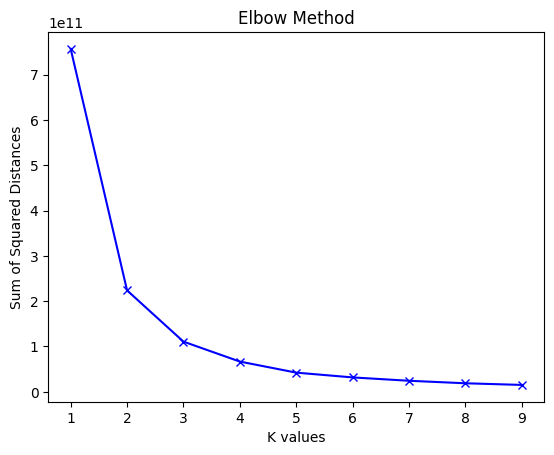

In [585]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_no_outliers)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Згідно графіку оптимальна кількість розбиття є на 3 класи, так як після цього значення відстань між класами зменшується не суттєво.

In [592]:
kmeans_no_outliers = KMeans(n_clusters=3, n_init='auto')
kmeans_no_outliers.fit(X_no_outliers)

KMeans(n_clusters=3)

In [593]:
labels_no_outliers = kmeans_no_outliers.predict(X_no_outliers)

In [594]:
centroids = kmeans_no_outliers.cluster_centers_
s = metrics.silhouette_score(X_no_outliers, labels_no_outliers, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.55


In [595]:
fig = px.scatter(
    df_no_outliers,
    x=df_no_outliers['Income'],
    y=df_no_outliers['Recency'],
    color=labels_no_outliers.astype(str),
    title="Recency vs Income",
    labels={"color": "Cluster"}
)

fig.show()

In [596]:
fig = px.scatter(
    df_no_outliers,
    x=df_no_outliers['NumWebVisitsMonth'],
    y=df_no_outliers['Income'],
    color=labels_no_outliers.astype(str),
    title="Income_NumWebVisitsMonth",
    labels={"color": "Cluster"}
)
fig.show()


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

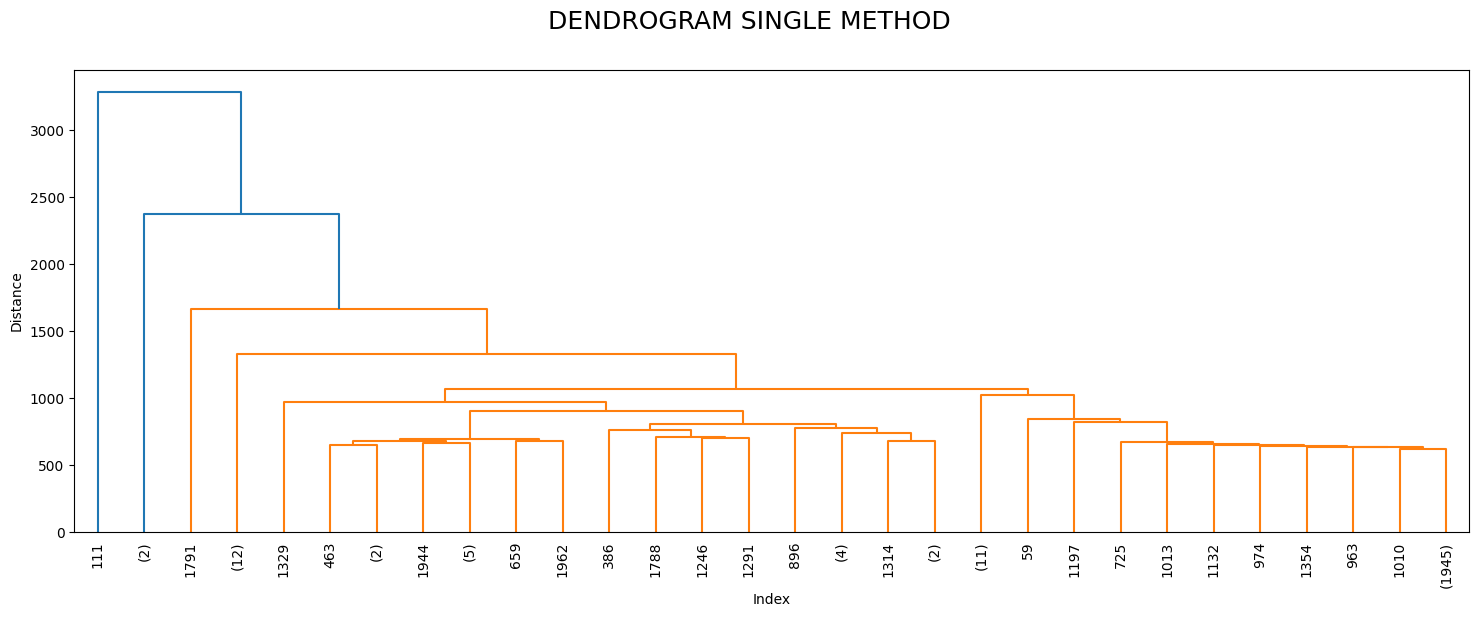

In [597]:
dist_sin = linkage(X_no_outliers, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [598]:
X_no_outliers['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_no_outliers['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

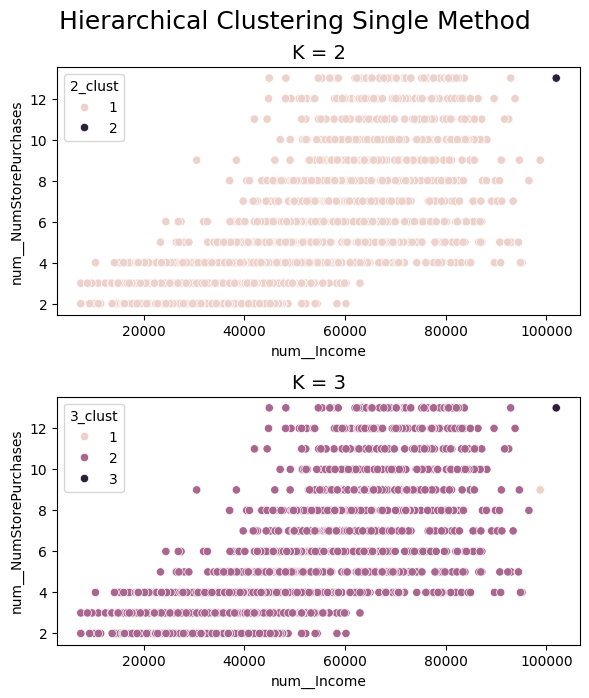

In [599]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="num__Income",y="num__NumStorePurchases", data=X_no_outliers, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="num__Income",y="num__NumStorePurchases", data=X_no_outliers, hue="3_clust")

plt.tight_layout();

In [600]:
score_2 = silhouette_score(X_no_outliers, X_no_outliers['2_clust'])
score_3 = silhouette_score(X_no_outliers, X_no_outliers['3_clust'])

print(f"Silhouette score (2 класти): {score_2:.3f}")
print(f"Silhouette score (3 класти): {score_3:.3f}")

Silhouette score (2 класти): 0.493
Silhouette score (3 класти): 0.458


Результати кластеризації не дуже вдалі. Даний метод згрупував майже всі точки в один кластер і погано справився з шумом, лише декілька крайніх точок були віднесені до інших кластерів.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

###DBSCAN Method###

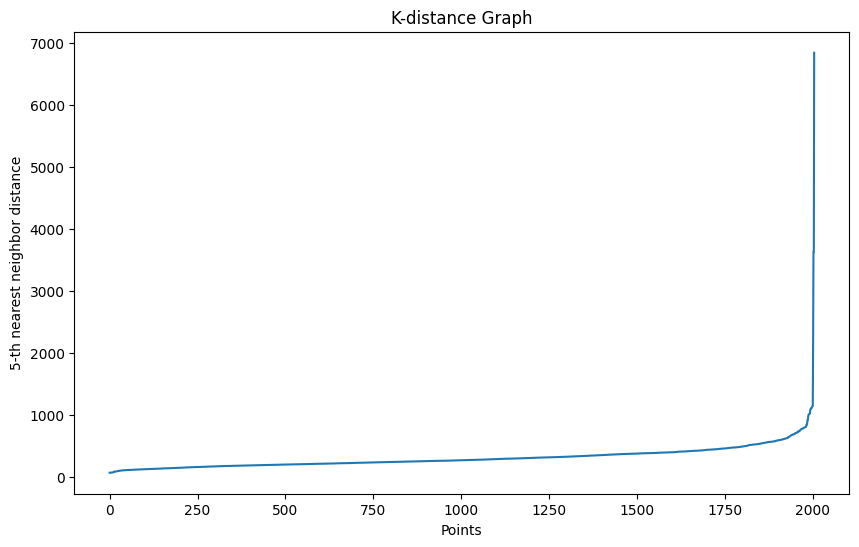

In [601]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X_no_outliers)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(X_no_outliers, k=5)

In [602]:
dbscan = DBSCAN(eps=1000, min_samples=5)
clusters = dbscan.fit_predict(X_no_outliers)
labels = dbscan.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [603]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [604]:
n_clusters_

5

In [605]:
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X_no_outliers, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Estimated number of clusters: 5
Estimated number of noise points: 5
Silhouette Coefficient for the data Dataset Clusters: 0.10


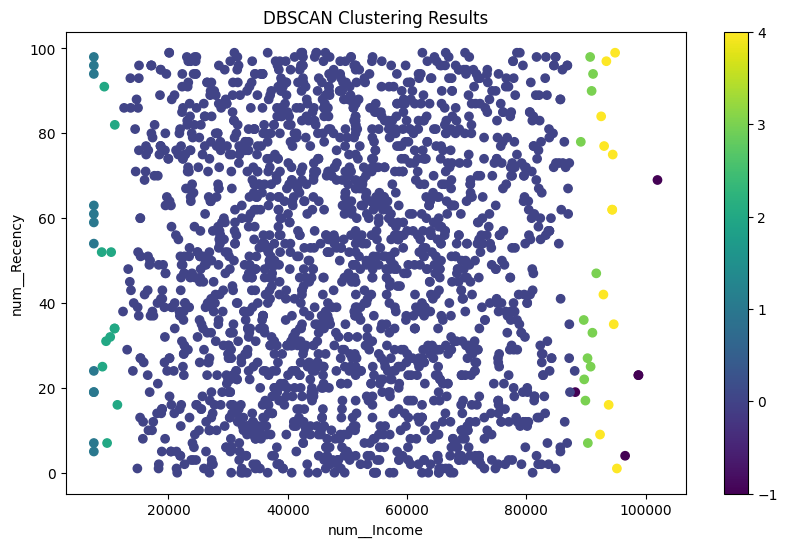

In [606]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_no_outliers['num__Income'], X_no_outliers['num__Recency'], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('num__Income')
plt.ylabel('num__Recency')
plt.show()

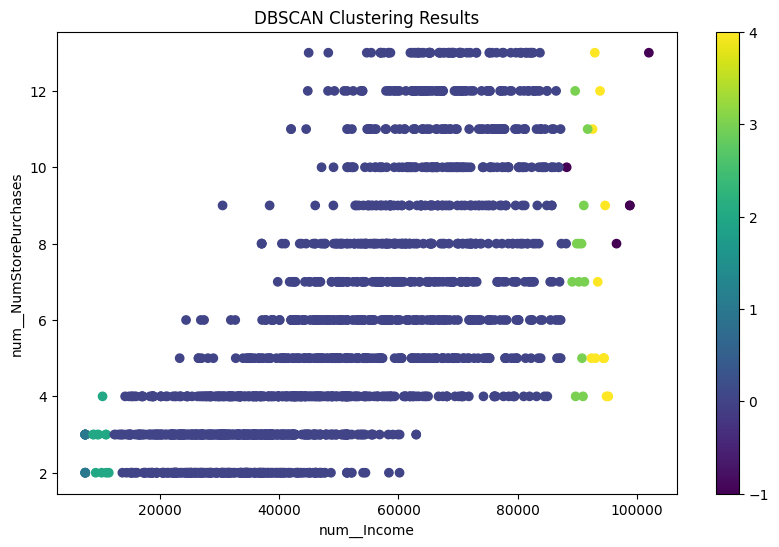

In [607]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_no_outliers['num__Income'], X_no_outliers['num__NumStorePurchases'], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('num__Income')
plt.ylabel('num__NumStorePurchases')
plt.show()

###DENDROGRAM WARD METHOD###

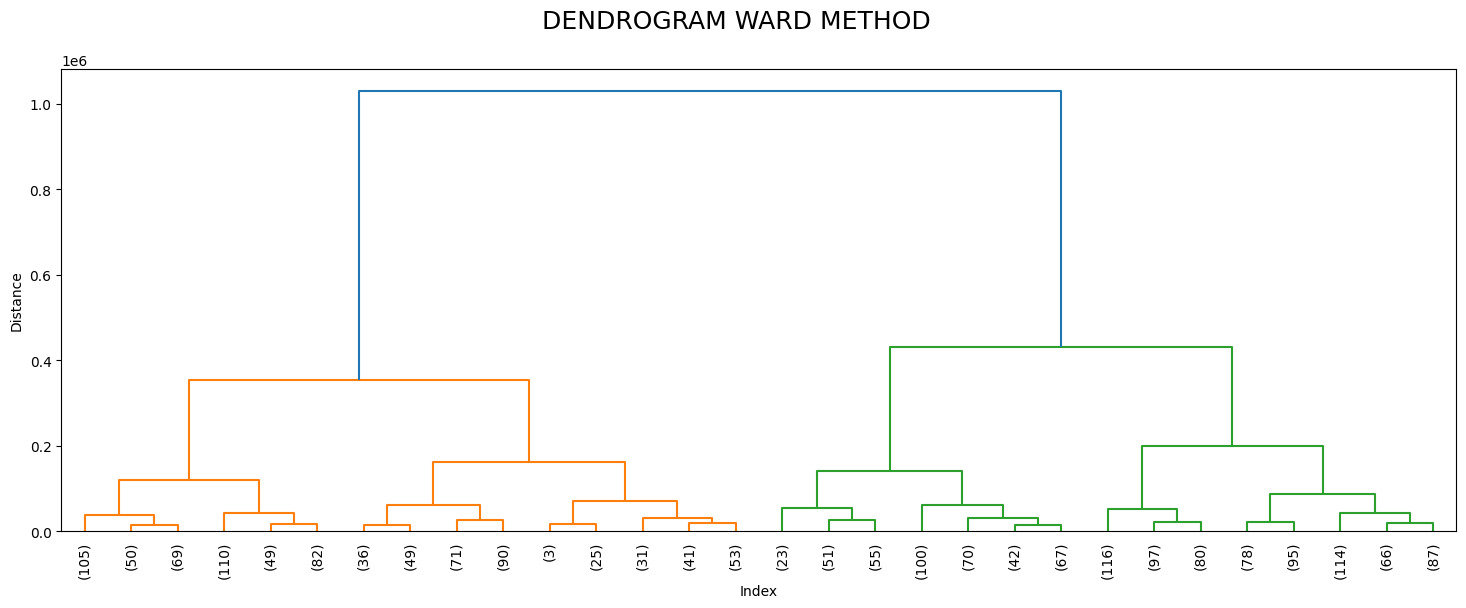

In [608]:
dist_sin = linkage(X_no_outliers, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM WARD METHOD",fontsize=18)
plt.show()

In [609]:
X_no_outliers['2_clust_ward'] = fcluster(dist_sin, 2, criterion='maxclust')
X_no_outliers['3_clust_ward'] = fcluster(dist_sin, 3, criterion='maxclust')
X_no_outliers['4_clust_ward'] = fcluster(dist_sin, 4, criterion='maxclust')

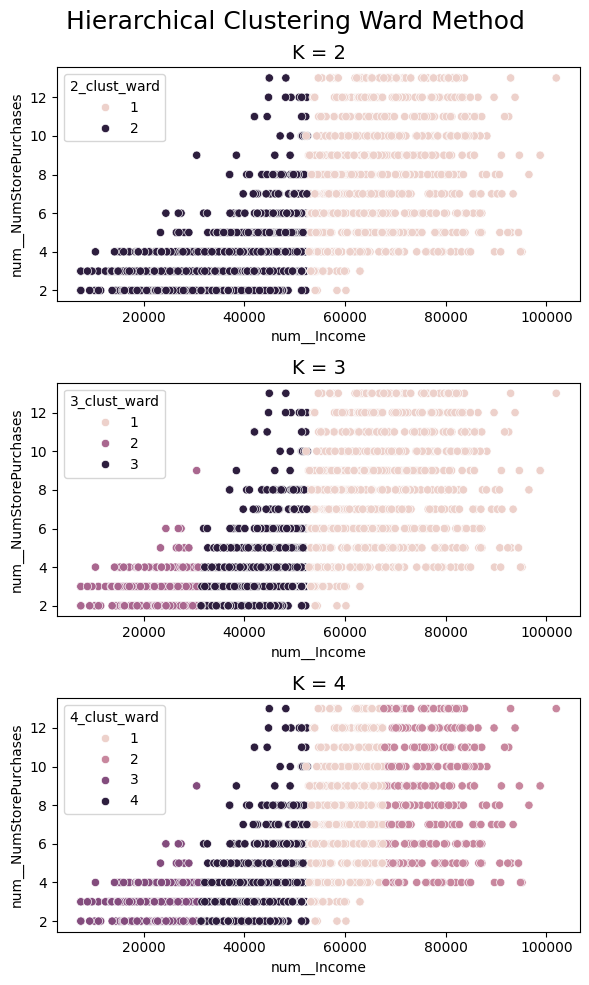

In [610]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Ward Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="num__Income",y="num__NumStorePurchases", data=X_no_outliers, hue="2_clust_ward")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="num__Income",y="num__NumStorePurchases", data=X_no_outliers, hue="3_clust_ward")

plt.subplot(3,1,3)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="num__Income",y="num__NumStorePurchases", data=X_no_outliers, hue="4_clust_ward")

plt.tight_layout();

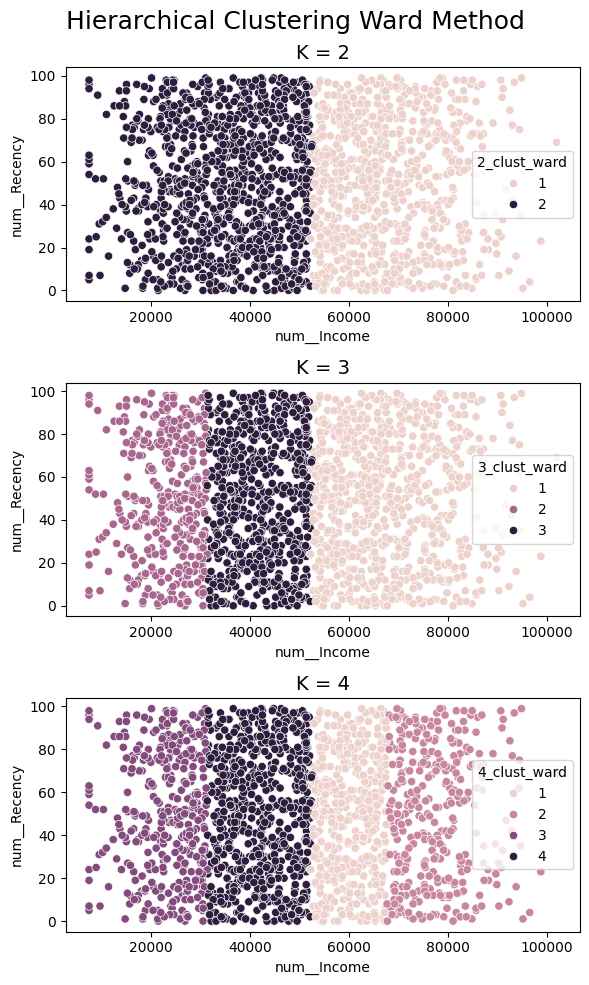

In [611]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Ward Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="num__Income",y="num__Recency", data=X_no_outliers, hue="2_clust_ward")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="num__Income",y="num__Recency", data=X_no_outliers, hue="3_clust_ward")

plt.subplot(3,1,3)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="num__Income",y="num__Recency", data=X_no_outliers, hue="4_clust_ward")

plt.tight_layout();

In [612]:
score_2_ward = silhouette_score(X_no_outliers, X_no_outliers['2_clust_ward'])
score_3_ward = silhouette_score(X_no_outliers, X_no_outliers['3_clust_ward'])
score_4_ward = silhouette_score(X_no_outliers, X_no_outliers['4_clust_ward'])

print(f"Silhouette score (2 класти): {score_2_ward:.3f}")
print(f"Silhouette score (3 класти): {score_3_ward:.3f}")
print(f"Silhouette score (4 класти): {score_4_ward:.3f}")

Silhouette score (2 класти): 0.593
Silhouette score (3 класти): 0.529
Silhouette score (4 класти): 0.512


Для n_clusters = 2, середній silhouette_score: 0.593
Для n_clusters = 3, середній silhouette_score: 0.529
Для n_clusters = 4, середній silhouette_score: 0.512
Для n_clusters = 5, середній silhouette_score: 0.501
Для n_clusters = 6, середній silhouette_score: 0.488


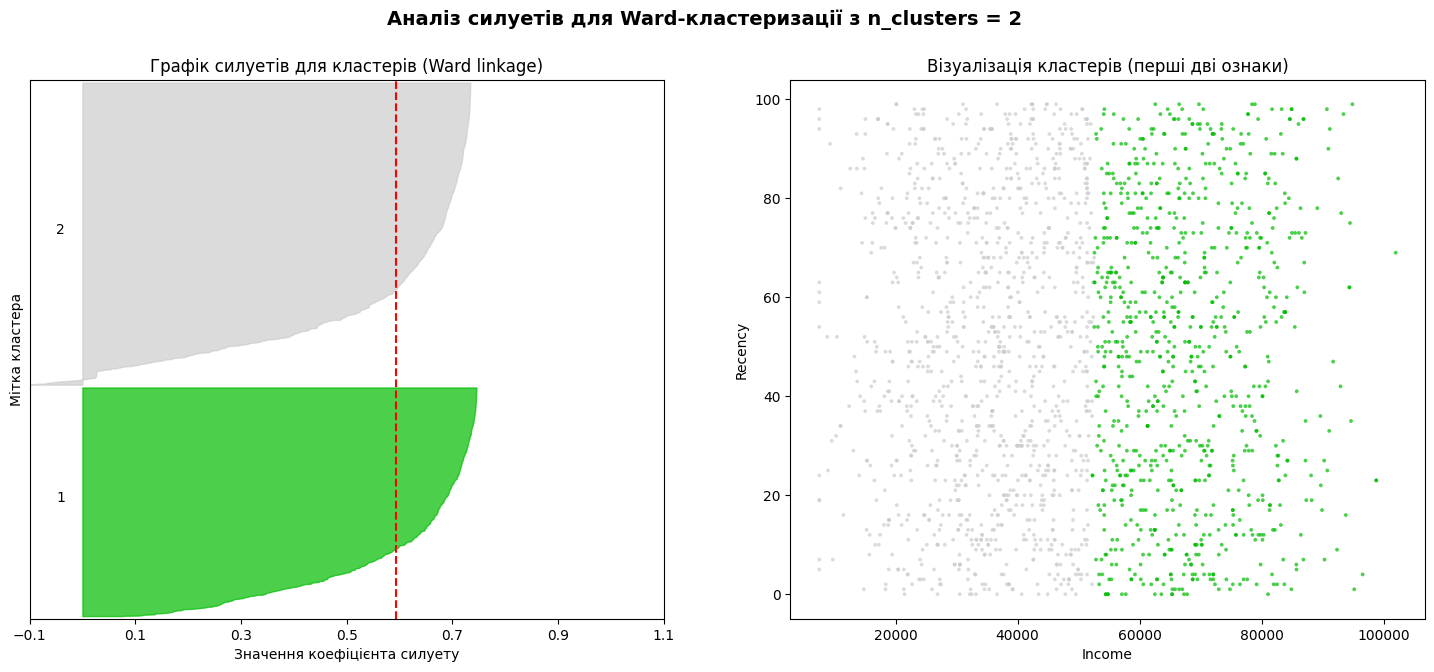

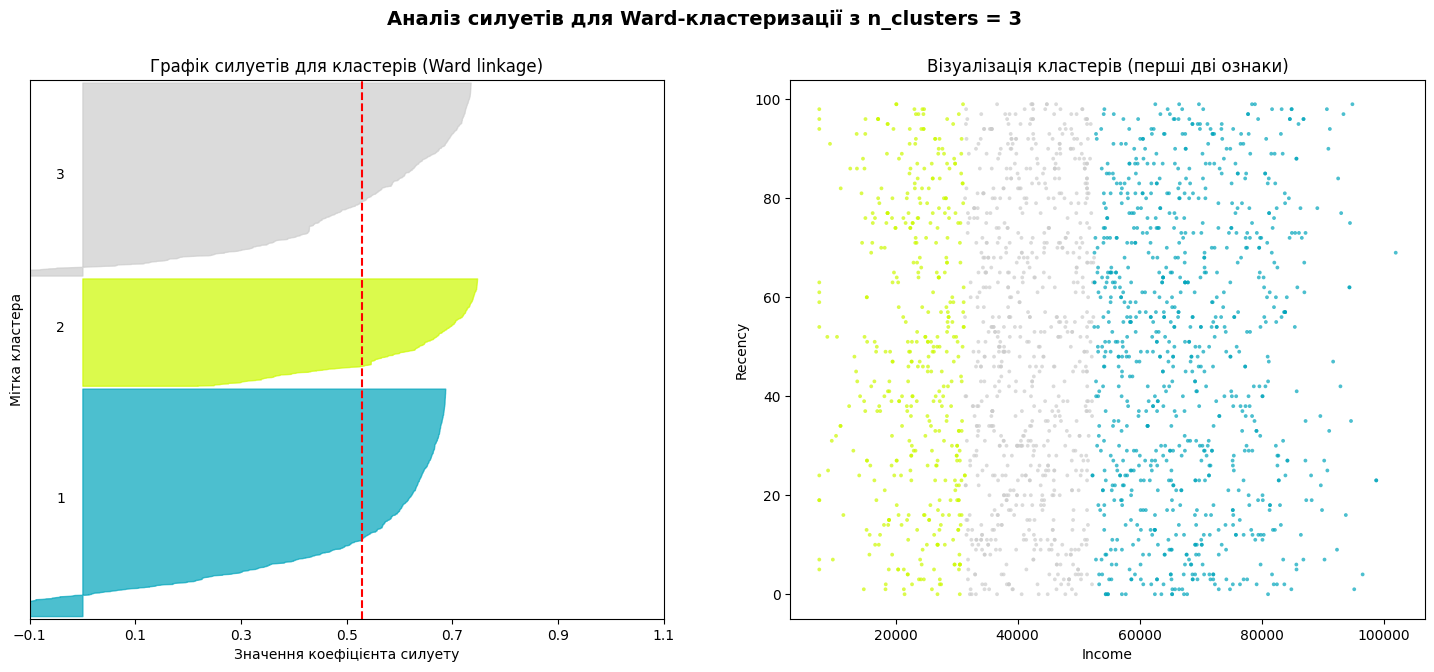

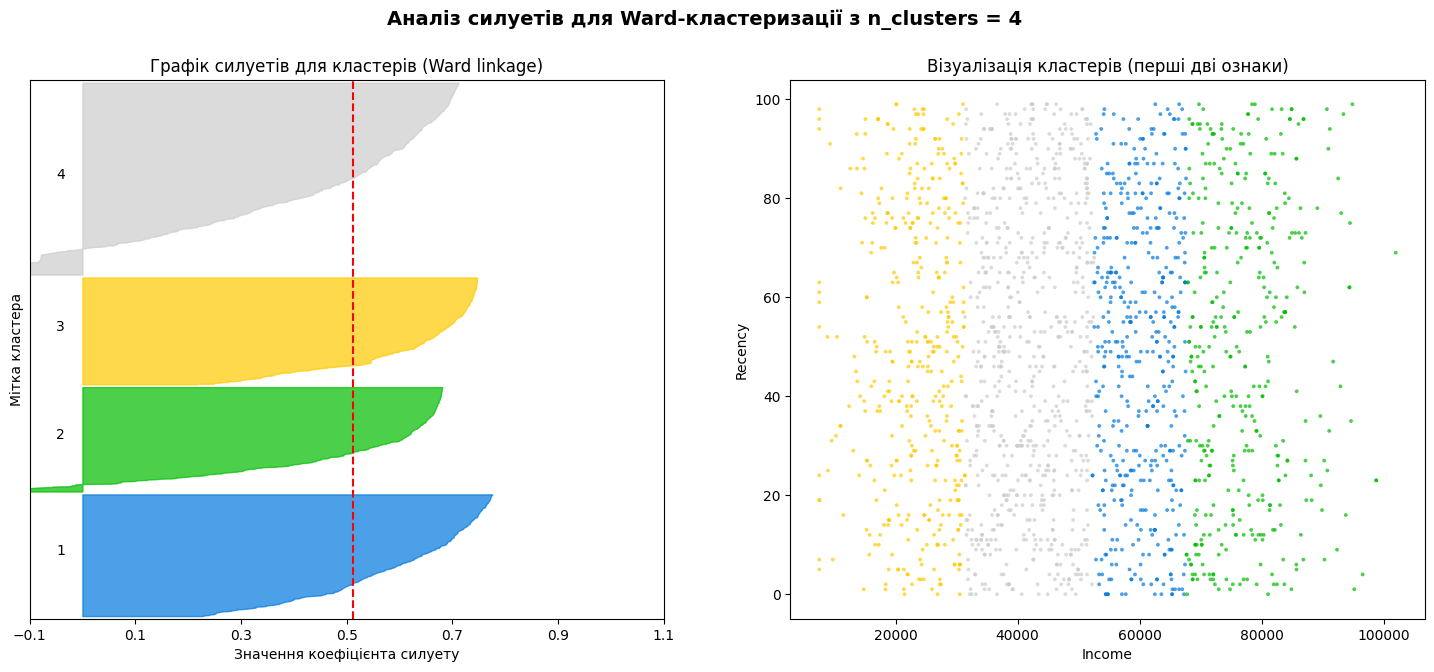

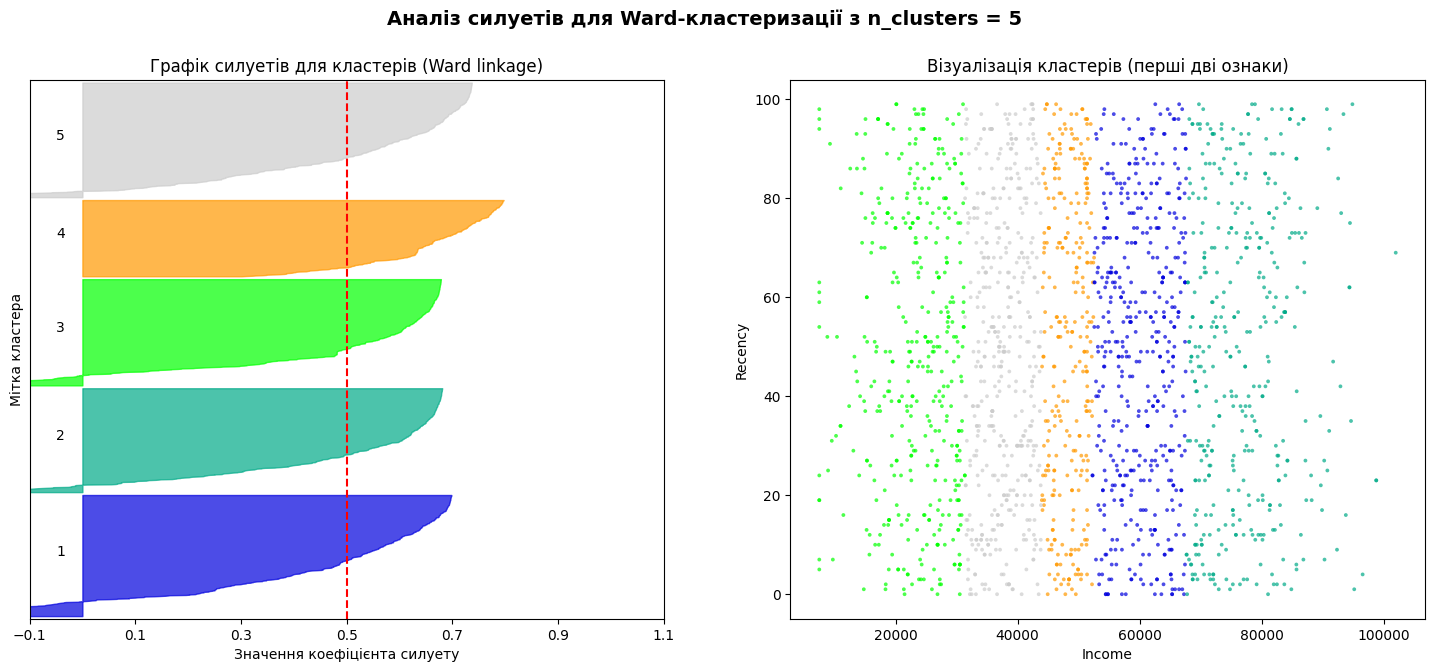

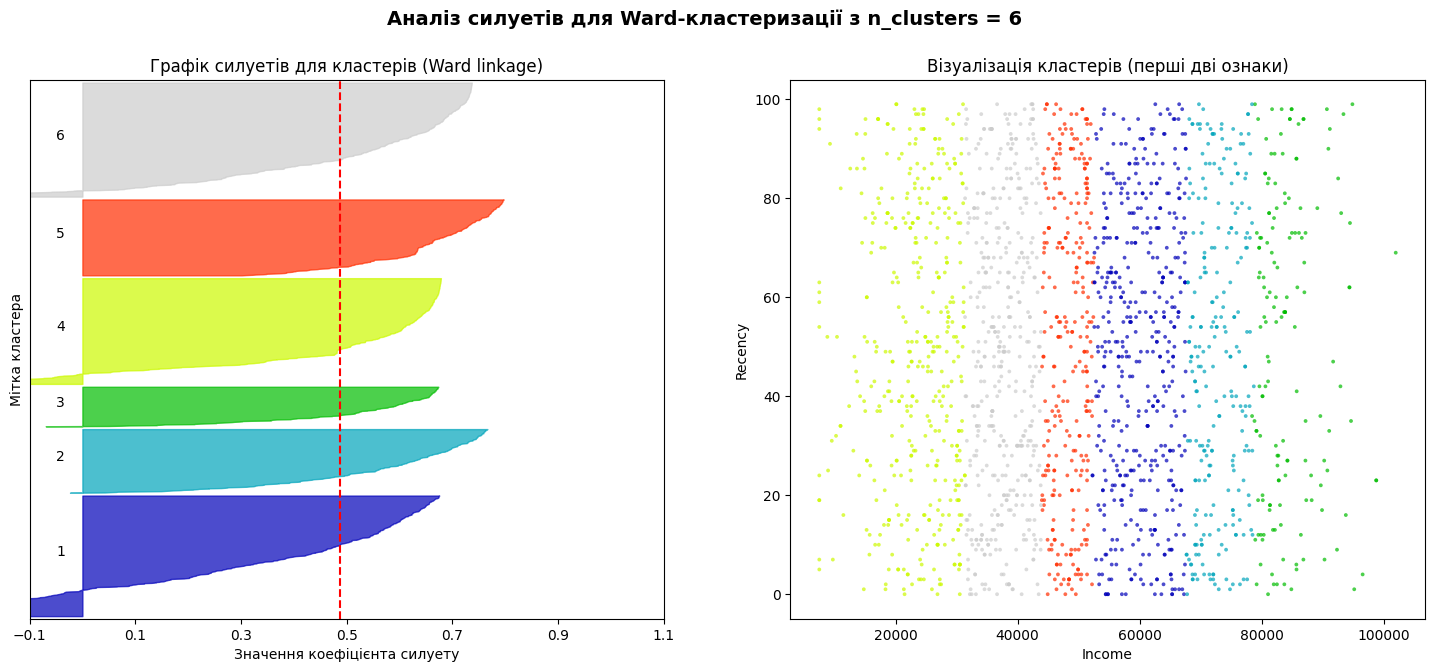

In [613]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_no_outliers) + (n_clusters + 1) * 10])

    # Отримуємо мітки кластерів з fcluster
    cluster_labels = fcluster(dist_sin, n_clusters, criterion='maxclust')

    silhouette_avg = silhouette_score(X_no_outliers, cluster_labels)
    print(f"Для n_clusters = {n_clusters}, середній silhouette_score: {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X_no_outliers, cluster_labels)

    y_lower = 10
    for i in range(1, n_clusters + 1):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Графік силуетів для кластерів (Ward linkage)")
    ax1.set_xlabel("Значення коефіцієнта силуету")
    ax1.set_ylabel("Мітка кластера")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2-й графік — візуалізація кластерів у перших 2-х вимірах
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_no_outliers['num__Income'], X_no_outliers['num__Recency'],
                marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("Візуалізація кластерів (перші дві ознаки)")
    ax2.set_xlabel("Income")
    ax2.set_ylabel("Recency")

    plt.suptitle(f"Аналіз силуетів для Ward-кластеризації з n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

plt.show()

DBSCAN метод гірше справився з кластеризацією у порівнянні з методом кластеризації зв'язності Ward - припускаю, що із-за великої кількісті шуму в даних. Метод Ward краще створив класи і в цілому досить непогано розбив дані на класи. Згідно метрики силуету найбільш оптимальним є розбиття на 2 класи.